In [ ]:
# importing neccessary libraries
# for performing EDA
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns




In [54]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv",low_memory=False)

In [55]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [56]:
df.shape

(7043, 21)

### There are 7043 data points and 20 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Inconsistent data types

- Categorical columns needs to be in Binary format.
- Total Charges should in float not object


## Checking for the null values and their proportion


## Overview 

In [57]:
print("Rows", df.shape[0]) 
print("Columns", df.shape[1])
print("\nFeatures: \n", df.columns.to_list())
print("\nMissing Values:", df.isnull().sum().values.sum())
print("\nUnique Values: \n", df.nunique())

Rows 7043
Columns 21

Features: 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing Values: 0

Unique Values: 
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [58]:
missing_values_summary = df.isnull().sum().reset_index()
missing_values_summary.columns = ['Feature', 'Missing Values']
missing_values_summary = missing_values_summary[missing_values_summary['Missing Values'] > 0]  # Filter features with missing values

rows_with_missing_values = df[df.isnull().any(axis=1)]

columns_with_missing_values = df.columns[df.isnull().any()].tolist()


In [59]:
missing_values_summary

,Feature,Missing Values


In [60]:
rows_with_missing_values

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### handling the missing values
- tenure
- 

## eNSURING DATA TYPE CONSISTENCY

In [61]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

In [62]:
# Total charges
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['tenure'] = df['tenure'].astype(int)

# redundant "No internet" -> "No"
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']

for i in replace_cols :
    df[i] = df[i].replace({'No internet service' : 'No'})

# Senior Citizen
# ensuring consistency in the values
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1:'Yes',0:'No'})

In [63]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [64]:
df['Contract'] = df['Contract'].replace({'Month-to-month':'Monthly'})

In [65]:
# separating churned and non churned customers
churn     = df[df["Churn"] == "Yes"]
not_churn = df[df["Churn"] == "No"]

# seperating the numerical and categorical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_columns.remove("customerID")
categorical_columns.remove("Churn")

In [16]:
display(categorical_columns,numerical_columns)


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

['tenure', 'MonthlyCharges', 'TotalCharges']

In [66]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


### Approach converting the tenure into bins :
#### It will help me for my model and for further analysis on which group of customers are showing more churn to understand and show case bussiness insights better

### creating the bins based on the years

In [67]:
def tenure_bin(tenure) :
    
    if tenure <= 12 :
        return '0-12'
    elif tenure <= 24 :
        return '12-24'
    elif tenure <= 48 :
        return '24-48'
    elif tenure <= 60 :
        return '48-60'
    else :
        return '60+'
    
df['tenure_bin'] = df['tenure'].apply(tenure_bin)

In [68]:
df['tenure_bin']

0        0-12
1       24-48
2        0-12
3       24-48
4        0-12
        ...  
7038    12-24
7039      60+
7040     0-12
7041     0-12
7042      60+
Name: tenure_bin, Length: 7043, dtype: object

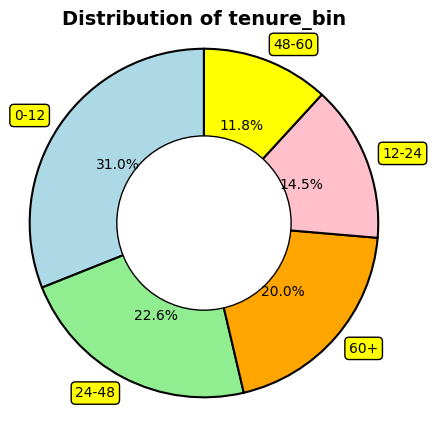

In [69]:
# gpt
def pie_chart(feature):
    labels = df[feature].value_counts().index
    sizes = df[feature].value_counts().values
    colors = ['lightblue', 'lightgreen', 'orange', 'pink', 'yellow']
    
    # figure and axis
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # Donut chart (Pie with a smaller hole)
    wedges, texts, autotexts = ax.pie(
        sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
        startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}  # Line separation
    )
    
    # Add a smaller white circle for a reduced donut effect
    center_circle = plt.Circle((0, 0), 0.50, fc='white',edgecolor='black')  # Hole size
    fig.gca().add_artist(center_circle)
    
    # Customize label texts inside a yellow box
    for text in texts:
        text.set_bbox(dict(facecolor='yellow', edgecolor='black', boxstyle='round,pad=0.3'))
    
    # Equal aspect ratio ensures the pie is drawn as a circle
    plt.axis('equal')  
    plt.title(f'Distribution of {feature}', fontsize=14, fontweight='bold')
    
    plt.show()


pie_chart('tenure_bin')


### As we can see the majority of customers are in *tenure_bin 0-12*:
- Suggest huge market and revenue potential if they stick to the company


### Customer attrition in data

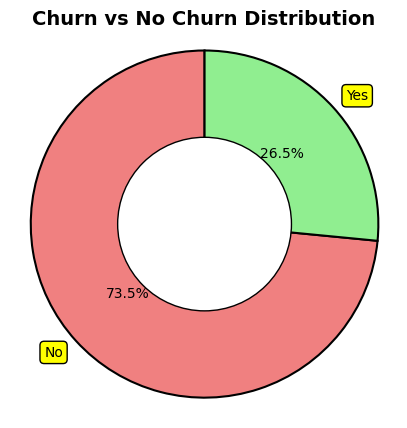

In [70]:


def churn_donut_chart():
    labels = df['Churn'].value_counts().index  # 'Yes' or 'No'
    sizes = df['Churn'].value_counts().values
    colors = ['lightcoral', 'lightgreen']  # Red for Churn, Green for No Churn
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # Donut chart
    wedges, texts, autotexts = ax.pie(
        sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
        startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}  # Line separation
    )
    
    # Add a smaller white circle for the donut effect
    center_circle = plt.Circle((0, 0), 0.50, fc='white',edgecolor='black')  # Hole size reduced
    fig.gca().add_artist(center_circle)
    
    # Customize label texts inside a yellow box
    for text in texts:
        text.set_bbox(dict(facecolor='yellow', edgecolor='black', boxstyle='round,pad=0.3'))
    
    # Equal aspect ratio ensures the pie is drawn as a circle
    plt.axis('equal')  
    plt.title('Churn vs No Churn Distribution', fontsize=14, fontweight='bold')
    
    plt.show()

# Call the function
churn_donut_chart()


#### Since the tenure=0 , means it is possible they are new customers they may not provide history for churn prediction
### - I choose to drop those 11 rows. 

In [72]:
df = df.dropna(subset=['TotalCharges'])# using zero to fill NaN values
# df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean()) # using mean to fill NaN values

# choosing to drop 

In [73]:
df['TotalCharges'].isna().sum().any()

False

### EDA


In [74]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,Monthly,Yes,Electronic check,29.85,29.85,No,0-12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Monthly,Yes,Mailed check,53.85,108.15,Yes,0-12
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Monthly,Yes,Electronic check,70.70,151.65,Yes,0-12


#### gender analysis

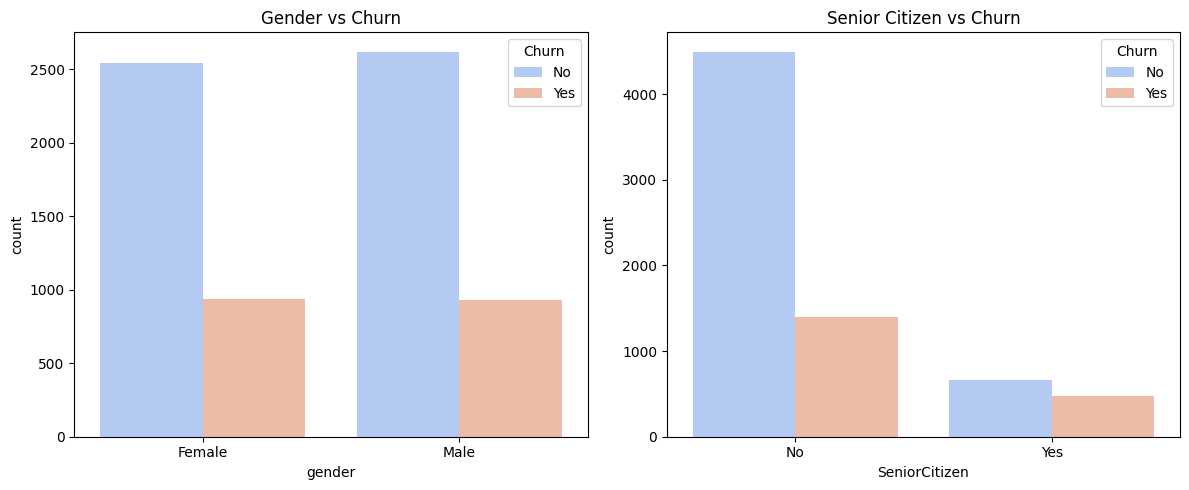

In [75]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='gender', hue='Churn', data=df, palette='coolwarm')
plt.title('Gender vs Churn')

# Senior Citizen vs Churn
plt.subplot(1, 2, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='coolwarm')
plt.title('Senior Citizen vs Churn')

plt.tight_layout()
plt.show()

### gender is not that much of the predcitor but senior citizen are.


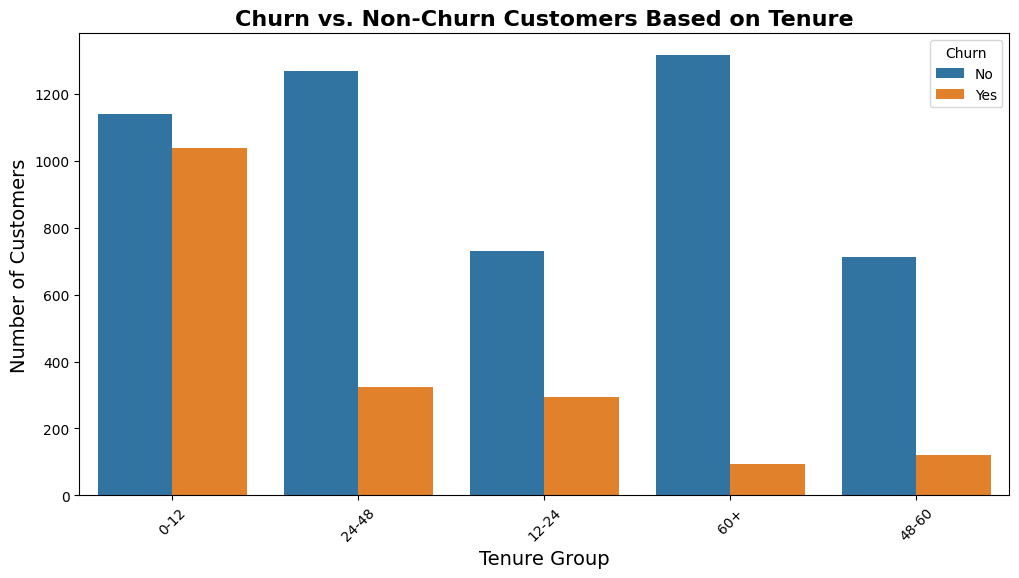

In [24]:
plt.figure(figsize=(12, 6))

sns.barplot(x="tenure_bin", y="tenure", hue="Churn", data=df, estimator=lambda x: len(x))


plt.xlabel("Tenure Group", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.title("Churn vs. Non-Churn Customers Based on Tenure", fontsize=16, fontweight="bold")

plt.xticks(rotation=45)
plt.show()


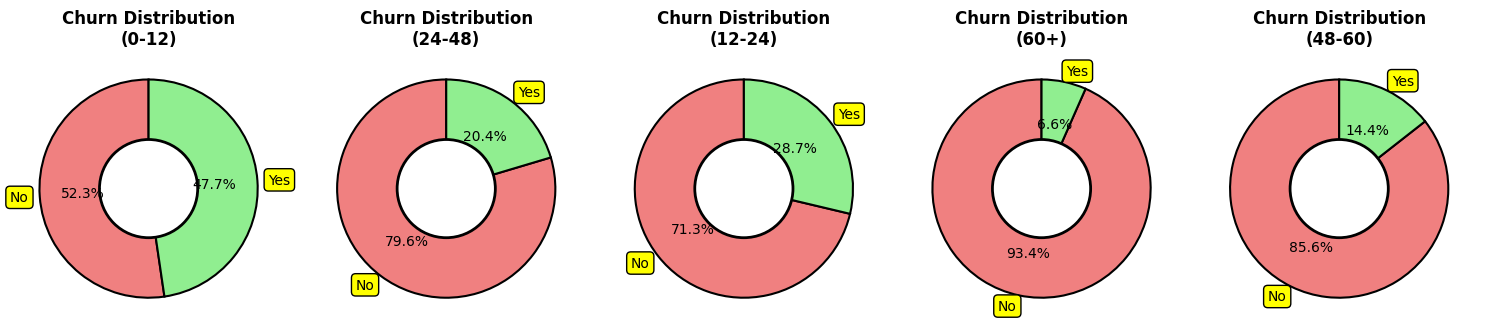

In [76]:
def donut_chart(ax, tenure_group, df):
    """Creates a donut chart for churn distribution within a tenure group."""
    # Filter data for the specific tenure group
    tenure_df = df[df["tenure_bin"] == tenure_group]
    
    # Get churn counts
    churn_counts = tenure_df["Churn"].value_counts()
    labels = churn_counts.index.astype(str)
    sizes = churn_counts.values

    # Create donut chart
    wedges, texts, autotexts = ax.pie(
        sizes, labels=labels, autopct='%1.1f%%', 
        startangle=90, colors=["lightcoral", "lightgreen"], 
        wedgeprops=dict(edgecolor="black", linewidth=1.5)  # Corrected wedgeprops syntax
    )
    
    # Add a white circle to create the donut effect with a black border
    center_circle = plt.Circle((0, 0), 0.45, fc="white", edgecolor="black", linewidth=2)
    ax.add_artist(center_circle)

    # Customize label texts inside a yellow box
    for text in texts:
        text.set_bbox(dict(facecolor="yellow", edgecolor="black", boxstyle="round,pad=0.3"))

    # Set title
    ax.set_title(f"Churn Distribution\n({tenure_group})", fontsize=12, fontweight="bold")

# Get unique tenure bins
tenure_bins = df["tenure_bin"].unique()

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, len(tenure_bins), figsize=(15, 6))

# If there's only one tenure bin, make sure axes is iterable
if len(tenure_bins) == 1:
    axes = [axes]

# Generate donut charts for each tenure group
for ax, tenure_group in zip(axes, tenure_bins):
    donut_chart(ax, tenure_group, df)

# Adjust layout
plt.tight_layout()
plt.show()


Key Takeaways:

High Churn Among New Customers (0-12 months)
- Churn Rate: ~52.3%
This suggests that customers who recently joined are more likely to leave.
    -better first-month offers, and proactive customer support to retain new customers.
    -Probablity because as we have seen in the early days of jio free plan subscription was very high due to **"Free Internet"** Same has happened in PM Ujjwala scheme regarding  **"Free gas cyclinder"**

- Churn Rate Increases in Mid-Tenure Groups (12-48 months)
        Churn Rate: 71.3% (12-24 months) and 79.6% (24-48 months)
        This shows a sharp increase in churn after the first year, possibly due to contract expirations or dissatisfaction with pricing/service.
        Business Implication: Implement loyalty programs, discounts, or personalized retention strategies to prevent mid-tenure customers from leaving.

- But same cant be said for 48-60 bin retaing them will be a better move.  Still Show High Churn (~85.6%) and need attention
        Even at this stage, churn is significant, suggesting some service or pricing dissatisfaction.
        Business Implication: Offer re-engagement incentives like upgrades, bundled services, or exclusive customer perks.

- Long-Term Customers (60+ months) Show the Lowest Churn
        Churn Rate: Only 6.6%
        Customers who stay for more than 5 years are highly loyal and unlikely to churn.
        Business Implication: Identify what keeps these customers engaged (e.g., exclusive plans, superior service) and replicate those strategies for newer customers.



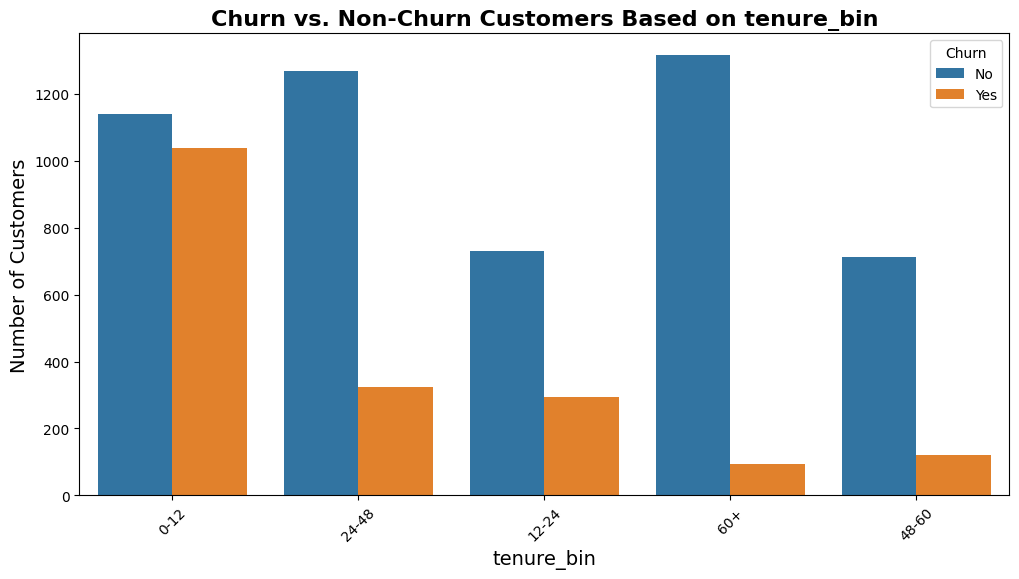

In [77]:
def plot_churn_distribution(feature, df):
    """
    Plots a bar chart showing churn vs non-churn based on a given categorical feature.
    
    Parameters:
    - feature (str): The categorical column name to analyze.
    - df (DataFrame): The dataset containing churn information.
    """
    plt.figure(figsize=(12, 6))

    sns.barplot(x=feature, y="tenure", hue="Churn", data=df, estimator=lambda x: len(x))

    plt.xlabel(feature, fontsize=14)
    plt.ylabel("Number of Customers", fontsize=14)
    plt.title(f"Churn vs. Non-Churn Customers Based on {feature}", fontsize=16, fontweight="bold")

    plt.xticks(rotation=45)
    plt.legend(title="Churn", loc="upper right")
    plt.show()

# Example usage:
plot_churn_distribution("tenure_bin", df)


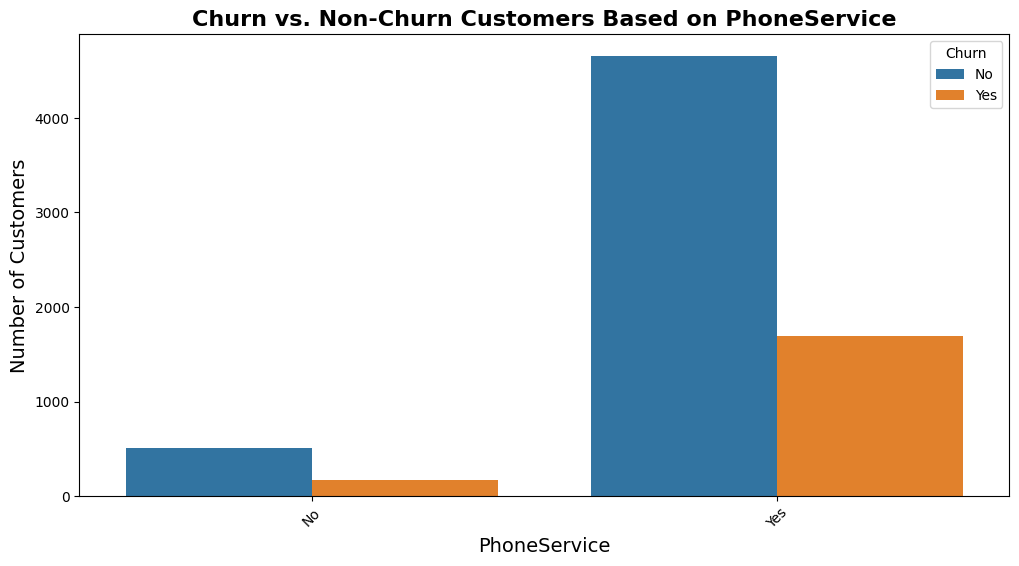

In [78]:
plot_churn_distribution('PhoneService', df)

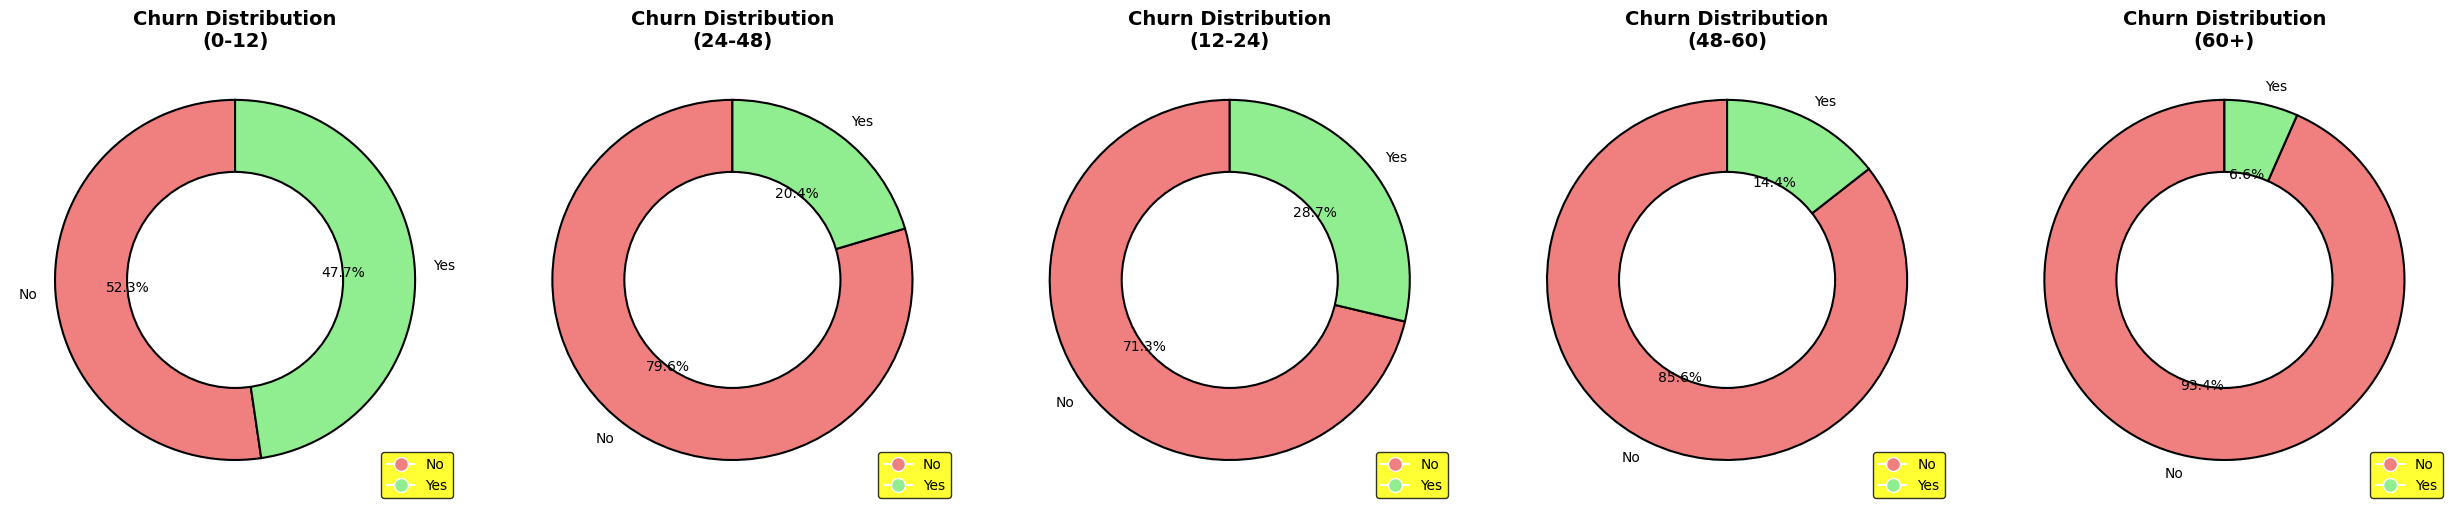

In [ ]:
def plot_churn_donut(feature, df):
    """
    Plots a donut chart showing the churn distribution based on a given categorical feature.
    
    Parameters:
    - feature (str): The categorical column to analyze.
    - df (DataFrame): The dataset containing churn information.
    """

    churn_counts = df[df["Churn"] == "Yes"][feature].value_counts()
    no_churn_counts = df[df["Churn"] == "No"][feature].value_counts()
    
    categories = churn_counts.index
    fig, axes = plt.subplots(1, len(categories), figsize=(5 * len(categories), 5))
    
    if len(categories) == 1:
        axes = [axes] 

    for i, category in enumerate(categories):
        sizes = [no_churn_counts.get(category, 0), churn_counts.get(category, 0)]
        labels = ["No", "Yes"]
        colors = ["lightcoral", "lightgreen"]
        
        wedges, texts, autotexts = axes[i].pie(
            sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
            startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
        )
        
        # Draw inner circle to make it a donut
        centre_circle = plt.Circle((0, 0), 0.6, fc="white", edgecolor="black", linewidth=1.5)
        axes[i].add_patch(centre_circle)

        # Title for each chart
        axes[i].set_title(f"Churn Distribution\n({category})", fontsize=14, fontweight="bold")

        # Add legend outside the chart
        legend_labels = ["No", "Yes"]
        legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10) for c in colors]
        axes[i].legend(legend_patches, legend_labels, loc="lower right", facecolor="yellow", edgecolor="black")
    # plt.title(f"Churn Distribution Based on {feature}", fontsize=16, fontweight="bold")
    plt.tight_layout()
    plt.show()


plot_churn_donut("tenure_bin", df)


## Univariate Analysis

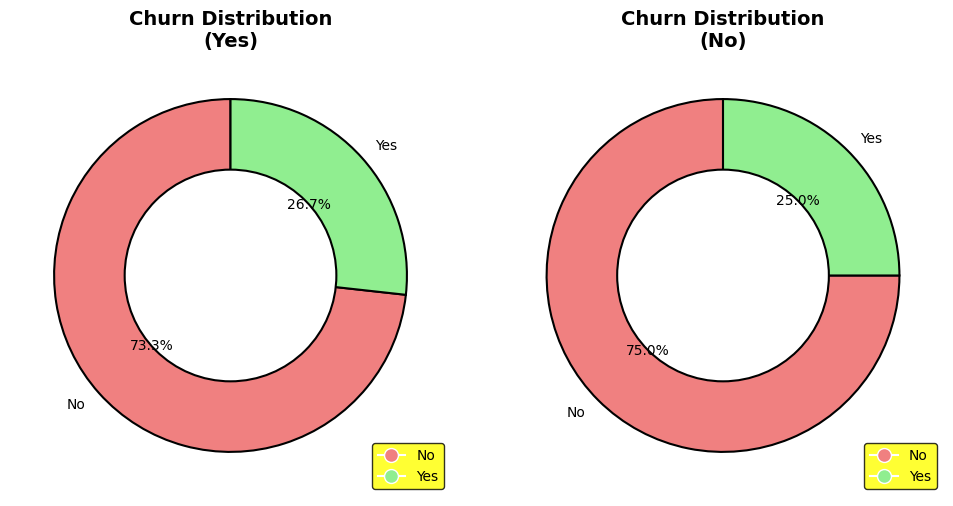

In [80]:
plot_churn_donut("PhoneService",df)

Churn Rate Is Similar Across Phone Service Categories

    The churn percentages for Yes and No categories of Phone Service are quite close (~26.7% and ~25.0% churn).
    This suggests that having or not having phone service does not significantly impact churn.

Majority of Customers in Both Categories Did Not Churn

    Around 73-75% of customers stayed, regardless of their Phone Service status.
    Phone service alone might not be a key differentiator in churn behavior.

### Phone Service Might Not Be a Strong Churn Predictor

## 2. Contract and churn

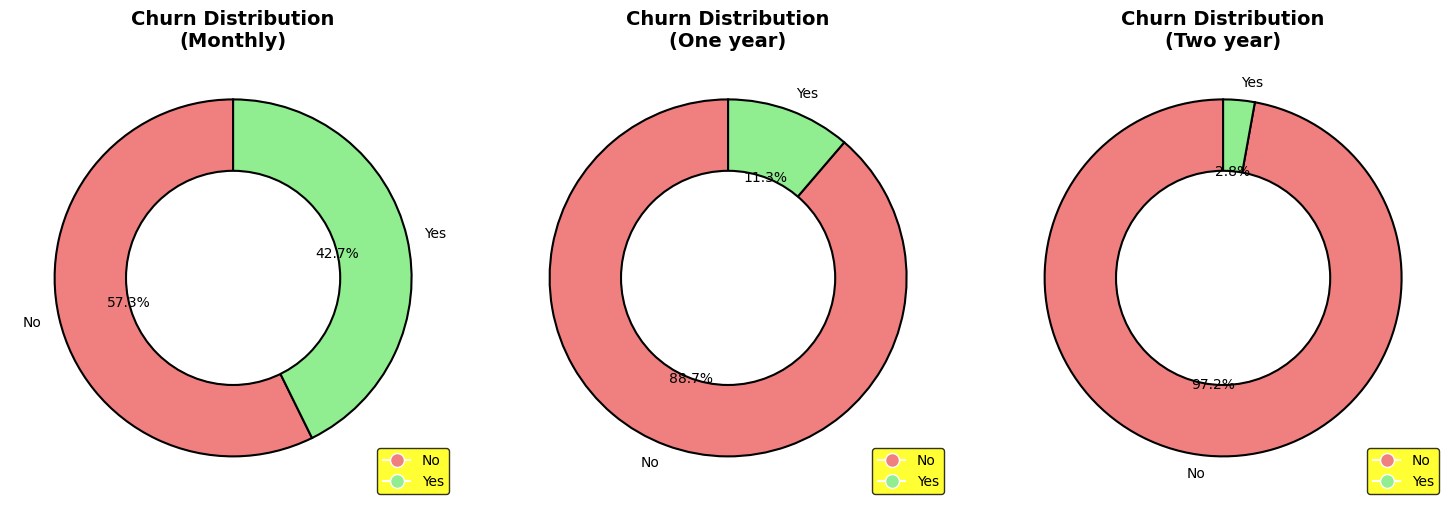

In [81]:
plot_churn_donut("Contract",df)

High Churn in Month-to-Month Contracts (42.7%)

    Customers with month-to-month contracts churn at a significantly higher rate than those with longer contracts.
    The flexibility of canceling anytime likely contributes to the lack of commitment.

Lower Churn in One-Year Contracts (11.3%)

    Churn is much lower compared to month-to-month contracts.
    A mid-term contract creates some customer retention, but still not as strong as longer commitments.

Extremely Low Churn in Two-Year Contracts (2.8%)

    Customers with long-term contracts (two years) rarely churn.
    The commitment reduces the likelihood of leaving, possibly due to discounts, loyalty perks, or contractual obligations.

## Insights
Offer better incentives (**discounts** or bundled services) for customers choosing one-year or two-year contracts.
retailers should highlight the **cost benefits of committing to a longer plan**

## 3. Internet Services

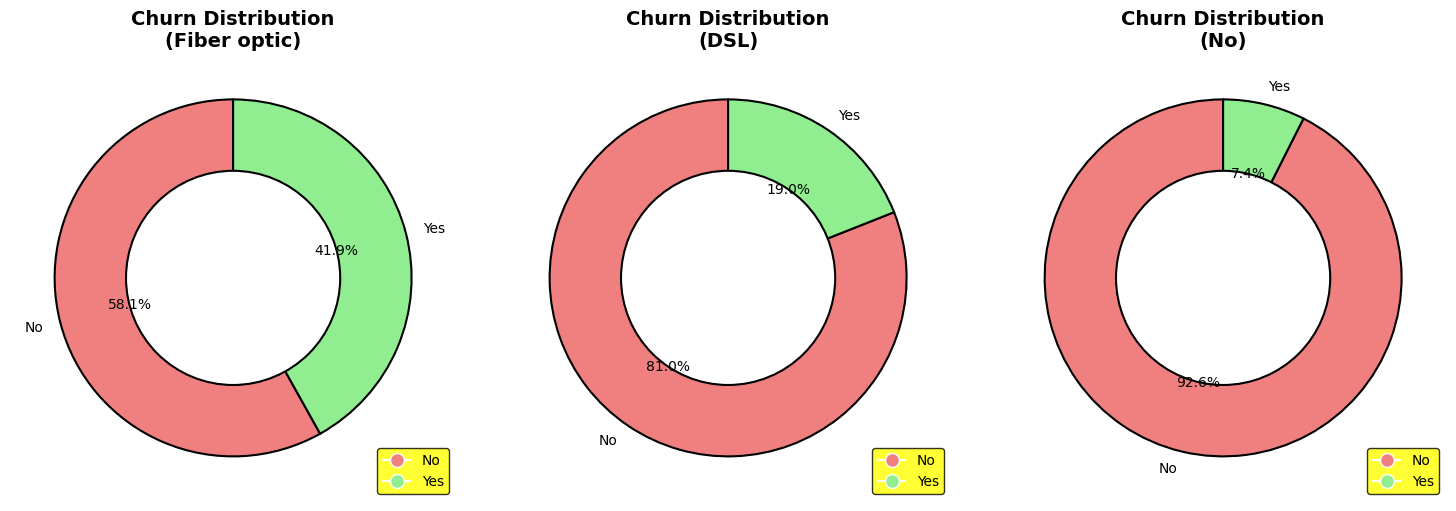

In [86]:
plot_churn_donut("InternetService",df)

1. Fiber Optic Users Have the Highest Churn Rate

- 41.9% of Fiber Optic customers churn, which is significantly higher than DSL (19%) and customers without internet service (7.4%).
- suggests service issues, pricing, or dissatisfaction with fiber optic internet.
- Also huge competition with the other service providers and ease of customers.

2.  DSL Has a Lower Churn Rate

- DSL customers churn at 19%, much lower than fiber optic users.
- This could mean DSL users are more satisfied  or locked into contracts with **fewer alternative**.
- may also indicate that DSL users are less price-sensitive or use internet for basic needs.

3. Customers Without Internet Rarely Churn

- Only 7.4% of customers without internet services churn, showing they are mostly retained.
- They might be using other bundled services (like phone or TV) that keep them loyal.

## 4. Payment Method

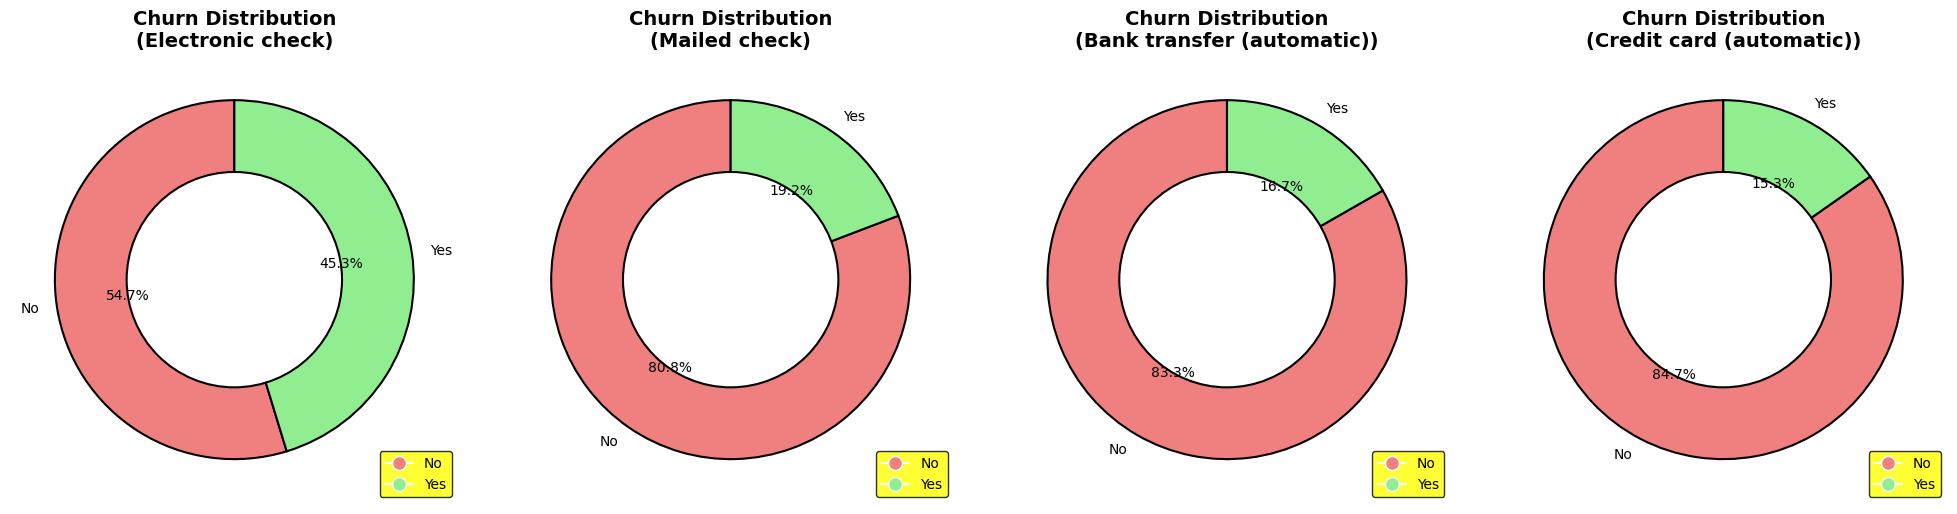

In [87]:
plot_churn_donut("PaymentMethod",df)

Insights Based on Payment Method and Churn Rate

1. ### Electronic Check Users Have the Highest Churn Rate

- 45.3% of customers who use electronic checks churn, which is the highest among all payment methods.
- suggests that customers paying via electronic checks might be less committed.
- Possible reasons: higher fees, inconvenience, or lack of auto-payment options.
- **Autopayment should be encouraged**

2. ### Mailed Checks Have a Lower Churn Rate (19.2%)

- Customers paying via mailed checks churn less than electronic check users.
- Maybe customers are **less tech-savvy**, **older** as we see in some european countries.


3. ### Automatic Payments (Bank Transfer & Credit Card) Have the Lowest Churn Rates

- Bank transfer users churn at 16.7%, while credit card users churn at only 15.3%.
- Customers using automatic payments are likely more stable and less likely to cancel impulsively.
- Auto-pay setups reduce service disruptions, late payments, and customer frustration, leading to higher retention rates.

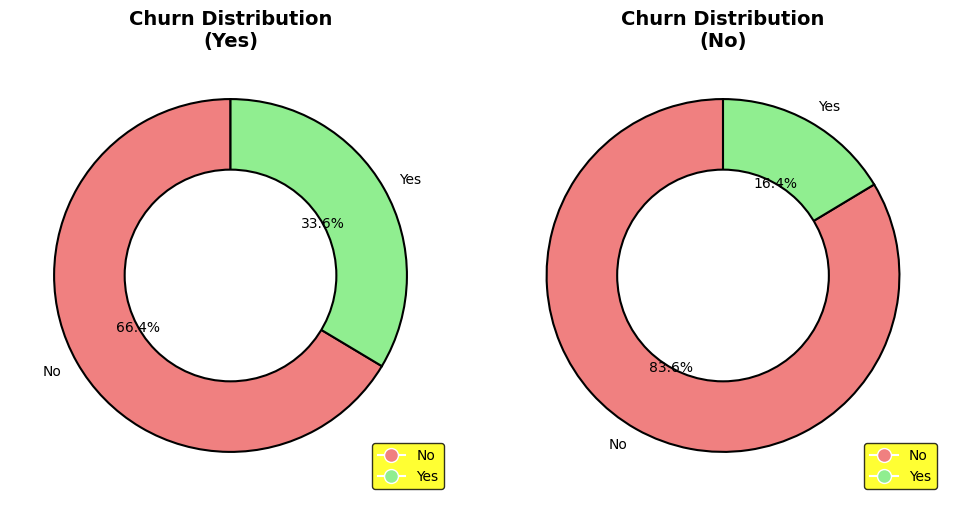

In [88]:
plot_churn_donut("PaperlessBilling",df)

## Same can be said here 
- loyalty and service
- Customers who opted for paperless billing suggest that they are tech-savvy but also means that they are able to switch quickly than the less tech savvyu people.

In [85]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,Monthly,Yes,Electronic check,29.85,29.85,No,0-12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Monthly,Yes,Mailed check,53.85,108.15,Yes,0-12
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Monthly,Yes,Electronic check,70.70,151.65,Yes,0-12


<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

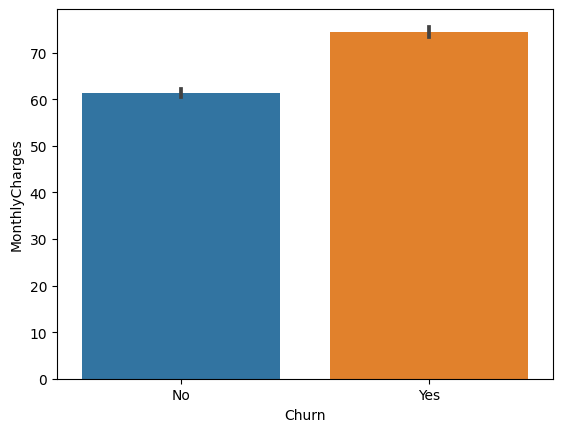

In [89]:
sns.barplot(x=df['Churn'],y=df['MonthlyCharges'])

Customers who churned ("Yes") have a higher average MonthlyCharge compared to those who did not churn ("No").
This suggests that higher pricing is correlated with a higher churn rate.
- Reasons
    1. Price Sensitivity

    - Customers with higher MonthlyCharges may feel they’re not getting enough value.
    - They might be switching to cheaper competitors.

- need for personalized plans or tiered pricing.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

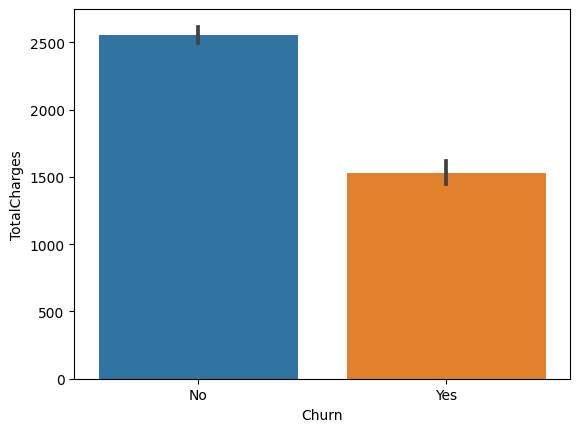

In [90]:
sns.barplot(x=df['Churn'],y=df['TotalCharges'])

## Moving for Bivariate analysis 

#### Numerical features

In [34]:
df[['MonthlyCharges','TotalCharges']].corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.651065
TotalCharges,0.651065,1.000000


## Correlation analysis 

## encoding the features


In [92]:
df1 = df.copy()

In [103]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_bin', 'AverageCharges'],
      dtype='object')

In [104]:
# Encode categorical columns with 'Yes'/'No' to 1/0
yes_no_columns = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','SeniorCitizen']

for col in yes_no_columns:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})



In [97]:
df['tenure_bin'].unique()

array(['0-12', '24-48', '12-24', '60+', '48-60'], dtype=object)

In [106]:
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [107]:
anova_model_mc = ols('MonthlyCharges ~ C(tenure_bin)', data=df).fit()
anova_results_mc = sm.stats.anova_lm(anova_model_mc, type=2)

# ANOVA for TotalCharges
anova_model_tc = ols('TotalCharges ~ C(tenure_bin)', data=df).fit()
anova_results_tc = sm.stats.anova_lm(anova_model_tc, type=2)

# Kruskal-Wallis Test for MonthlyCharges
kw_mc = stats.kruskal(*[df.loc[df['tenure_bin'] == bin, 'MonthlyCharges'] for bin in df['tenure_bin'].unique()])

# Kruskal-Wallis Test for TotalCharges
kw_tc = stats.kruskal(*[df.loc[df['tenure_bin'] == bin, 'TotalCharges'] for bin in df['tenure_bin'].unique()])

# Print results
print("ANOVA Results for Monthly Charges:\n", anova_results_mc)
print("\nANOVA Results for Total Charges:\n", anova_results_tc)

print("\nKruskal-Wallis Test for Monthly Charges:\n", kw_mc)
print("\nKruskal-Wallis Test for Total Charges:\n", kw_tc)

ANOVA Results for Monthly Charges:
                    df        sum_sq       mean_sq           F        PR(>F)
C(tenure_bin)     4.0  3.786075e+05  94651.865046  111.119547  5.427939e-92
Residual       7027.0  5.985613e+06    851.802114         NaN           NaN

ANOVA Results for Total Charges:
                    df        sum_sq       mean_sq            F  PR(>F)
C(tenure_bin)     4.0  2.399611e+10  5.999028e+09  3475.013038     0.0
Residual       7027.0  1.213094e+10  1.726333e+06          NaN     NaN

Kruskal-Wallis Test for Monthly Charges:
 KruskalResult(statistic=503.3655958922016, pvalue=1.2535028889398307e-107)

Kruskal-Wallis Test for Total Charges:
 KruskalResult(statistic=5320.596192450474, pvalue=0.0)


### Since the p-values are extremely small we can reject the null hypothesis that distribution of the feature accross diffenret bins are same . 
- But shows "TotalCharges" shows a very strong relation with tenure (long tenure -> higher charges )
- monthly charges are independent of the tenure

- for classifciation based model keeping both the features 
- for regression based model dropping totla charges will be better idea since its highly correlated with the tenure
    - or we can transfor the total charges into average

## Derived feature

In [100]:
## Transforming the total charges to average charges based on tenure to remove the dependency on tenure

df['AverageCharges'] = df['TotalCharges'] / df['tenure']

<AxesSubplot:xlabel='Churn', ylabel='AverageCharges'>

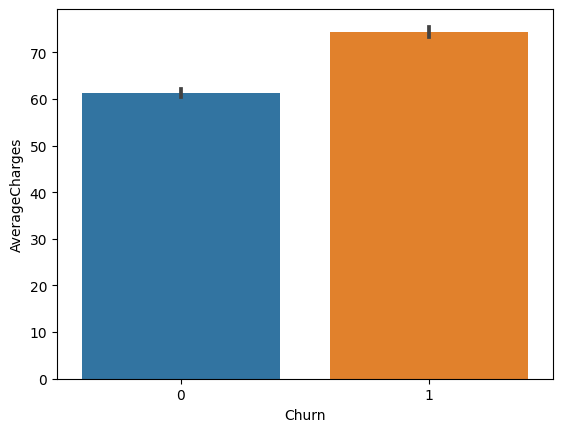

In [101]:
sns.barplot(x=df['Churn'],y=df['AverageCharges'])

It is same like total charges we can move with this

In [108]:
df[categorical_columns].apply(lambda x : x.unique())

gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                        [1, 0]
Dependents                                                     [0, 1]
PhoneService                                                   [0, 1]
MultipleLines                                                  [0, 1]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                                                 [0, 1]
OnlineBackup                                                   [1, 0]
DeviceProtection                                               [0, 1]
TechSupport                                                    [0, 1]
StreamingTV                                                    [0, 1]
StreamingMovies                                                [0, 1]
Contract                                [Monthly, One year, Two year]
PaperlessBilling    

### Binary columns 
### Nominbal columns 
- InternetService,Contract,PaymentMethod,tenure_bin 

## Performing chi square test for the binary features

In [109]:
nominal_features = ['tenure_bin', 'Contract', 'InternetService', 'PaymentMethod']
bin_features = ['PhoneService', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'SeniorCitizen']

In [110]:
from scipy.stats import chi2_contingency
import itertools

# Chi-square test
def chi_square_test(df, binary_features):
    results = []
    for col1, col2 in itertools.combinations(binary_features, 2):  # Get all pairs
        contingency_table = pd.crosstab(df[col1], df[col2])  # Create contingency table
        chi2, p, dof, expected = chi2_contingency(contingency_table)  # Perform chi-square test
        results.append({'Feature 1': col1, 'Feature 2': col2, 'Chi2 Statistic': chi2, 'p-value': p})

    return pd.DataFrame(results)


chi_square_results = chi_square_test(df, bin_features)

# Results sorted by p-value
chi_square_results.sort_values(by='p-value', ascending=True)


,Feature 1,Feature 2,Chi2 Statistic,p-value
42,StreamingTV,StreamingMovies,1998.315014,0.000000e+00
37,DeviceProtection,StreamingMovies,1136.408842,4.034101e-249
36,DeviceProtection,StreamingTV,1067.462401,3.898008e-234
26,OnlineSecurity,TechSupport,881.776995,8.981068e-194
35,DeviceProtection,TechSupport,777.525971,4.153426e-171
30,OnlineBackup,DeviceProtection,644.505044,3.500771e-142
31,OnlineBackup,TechSupport,605.236679,1.215592e-133
24,OnlineSecurity,OnlineBackup,563.001575,1.869298e-124
32,OnlineBackup,StreamingTV,556.414450,5.065254e-123
40,TechSupport,StreamingMovies,550.654376,9.070617e-122


1. Highly Significant Pairs (p-value ≈ 0)
    - StreamingTV & StreamingMovies (1998.31)
    - DeviceProtection & StreamingMovies (1136.41)
    - DeviceProtection & StreamingTV (1067.46)
    - OnlineSecurity & TechSupport (881.78)
    - DeviceProtection & TechSupport (777.53)

- p-value close to 0, suggesting a strong dependency between these features.

2. Moderately Significant Pairs (p-value < 0.05)
    - PhoneService & TechSupport (62.94, p ≈ 2.13e-15)
    - PhoneService & OnlineSecurity (58.42, p ≈ 2.12e-14)
    - DeviceProtection & SeniorCitizen (24.57, p ≈ 7.17e-07)

- some level of association but are not as strong as the first category.

3. Non-Significant Pairs (p-value > 0.05)
    - PhoneService & StreamingTV (3.07, p ≈ 0.0798)
    - PhoneService & PaperlessBilling (1.85, p ≈ 0.174)
    - PhoneService & SeniorCitizen (0.42, p ≈ 0.516)

These pairs have high p-values, suggesting no statistically significant relationship.

Next Steps:

    Drop highly correlated features to avoid multicollinearity if you're using these features in modeling.
    Explore further using Cramér's V to measure the effect size of associations.
    Perform feature selection by removing redundant features if your goal is dimensionality reduction.

### Cramer test to check for redundancy 

In [111]:
def cramers_v(x, y):
    """Calculate Cramér's V for two categorical variables."""
    # Create a contingency table
    confusion_matrix = pd.crosstab(x, y)
    
    # Perform the Chi-Square test
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    
    # Compute Cramér's V
    n = confusion_matrix.sum().sum()  # Total observations
    r, k = confusion_matrix.shape     # Rows and columns
    v = np.sqrt(chi2 / (n * (min(r, k) - 1)))
    
    return v



# Get categorical columns
categorical_columns = bin_features  # Replace with actual column names

# Compute Cramér's V for each pair of categorical features
results = []
for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):  # Avoid duplicate pairs
        col1, col2 = categorical_columns[i], categorical_columns[j]
        v = cramers_v(df[col1], df[col2])
        results.append((col1, col2, v))

# Convert results to DataFrame
cramers_v_df = pd.DataFrame(results, columns=["Feature1", "Feature2", "Cramer_V"])
cramers_v_df = cramers_v_df.sort_values(by="Cramer_V", ascending=False)

# Display results
cramers_v_df


,Feature1,Feature2,Cramer_V
42,StreamingTV,StreamingMovies,0.533080
37,DeviceProtection,StreamingMovies,0.402002
36,DeviceProtection,StreamingTV,0.389616
26,OnlineSecurity,TechSupport,0.354111
35,DeviceProtection,TechSupport,0.332520
30,OnlineBackup,DeviceProtection,0.302743
31,OnlineBackup,TechSupport,0.293375
24,OnlineSecurity,OnlineBackup,0.282954
32,OnlineBackup,StreamingTV,0.281294
40,TechSupport,StreamingMovies,0.279834


In [45]:


def cramers_v(x, y):
    """Compute Cramér's V between two categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]  # Get chi-square statistic
    n = confusion_matrix.sum().sum()  # Total observations
    r, k = confusion_matrix.shape  # Number of rows and columns
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

def remove_redundant_features(df, categorical_features, threshold=0.8):
    """Removes redundant categorical features using Cramér's V."""
    redundant_features = set()
    feature_pairs = []
    
    for i in range(len(categorical_features)):
        for j in range(i + 1, len(categorical_features)):
            f1, f2 = categorical_features[i], categorical_features[j]
            v = cramers_v(df[f1], df[f2])
            
            if v > threshold:  # If correlation is high
                feature_pairs.append((f1, f2, v))
                redundant_features.add(f2)  # Keep one, remove the other
    
    # Remove redundant features
    reduced_df = df.drop(columns=redundant_features)
    
    return reduced_df, pd.DataFrame(feature_pairs, columns=["Feature1", "Feature2", "Cramer_V"])

# Load 


# Select categorical features
categorical_features = bin_features  # Replace with actual categorical columns

# Remove redundant features
reduced_df, correlation_df = remove_redundant_features(df, categorical_features)

# Display redundant features
print("Highly Correlated Features (Cramér's V > 0.8):")
print(correlation_df.sort_values(by="Cramer_V", ascending=False))

# Final dataset without redundant categorical features
print("Reduced dataset shape:", reduced_df.shape)


Highly Correlated Features (Cramér's V > 0.8):
Empty DataFrame
Columns: [Feature1, Feature2, Cramer_V]
Index: []
Reduced dataset shape: (7032, 23)


In [112]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin,AverageCharges
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,Monthly,1,Electronic check,29.85,29.85,0,0-12,29.850000
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,One year,0,Mailed check,56.95,1889.50,0,24-48,55.573529
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,Monthly,1,Mailed check,53.85,108.15,1,0-12,54.075000
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,24-48,40.905556
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,Monthly,1,Electronic check,70.70,151.65,1,0-12,75.825000


### For nominal columns

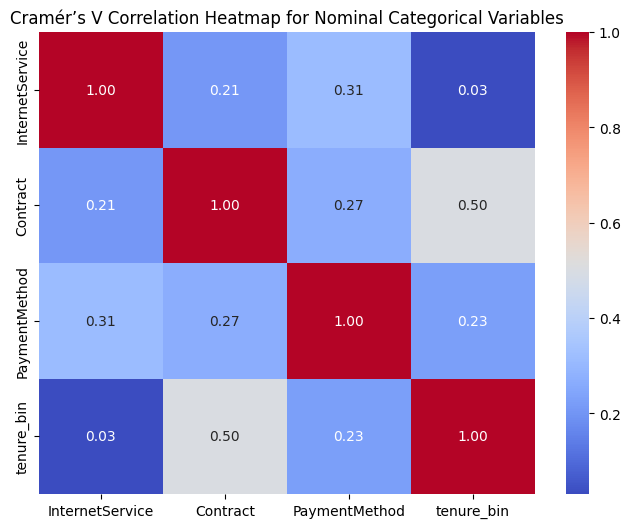

In [115]:
import pandas as pd


# Function to compute Chi-Square p-value
def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    return p  # p-value tells us if they are dependent

# Function to compute Cramér’s V
def cramers_v(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, _, _, _ = stats.chi2_contingency(contingency_table)
    n = df.shape[0]
    k, r = contingency_table.shape
    return np.sqrt(chi2 / (n * min(k - 1, r - 1)))

# List of nominal categorical columns
nominal_cols = ['InternetService', 'Contract','PaymentMethod','tenure_bin']  # Replace with actual column names

# Compute Cramér’s V and Chi-Square p-values
correlation_matrix = pd.DataFrame(index=nominal_cols, columns=nominal_cols)

for col1 in nominal_cols:
    for col2 in nominal_cols:
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 1.0  # Self-correlation = 1
        else:
            correlation_matrix.loc[col1, col2] = cramers_v(df, col1, col2)

# Convert to float and plot heatmap
correlation_matrix = correlation_matrix.astype(float)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cramér’s V Correlation Heatmap for Nominal Categorical Variables")
plt.show()


Strongest Correlation (0.50)

- Contract & Tenure_bin → Customers with longer tenure are more likely to have long-term contracts.

Moderate Correlation (0.31)
- InternetService & PaymentMethod → Internet service type might influence the preferred payment method.

Weak Correlations (< 0.30)

- InternetService & Contract (0.21)
- Contract & PaymentMethod (0.27)
- PaymentMethod & Tenure_bin (0.23)

No Significant Correlation (≈ 0)

- InternetService & Tenure_bin (0.03) → Tenure length does not strongly influence the type of internet service.

In [114]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_bin', 'AverageCharges'],
      dtype='object')

In [149]:
df1 = df.copy()

### Removing highly correalted columns
- StreamingTv
- Device Protection
- Tech Support

In [150]:
df1 = df1.drop(columns=['StreamingTV','DeviceProtection','TechSupport'])

In [151]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin,AverageCharges
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,Monthly,1,Electronic check,29.85,29.85,0,0-12,29.850000
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,0,One year,0,Mailed check,56.95,1889.50,0,24-48,55.573529
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,Monthly,1,Mailed check,53.85,108.15,1,0-12,54.075000
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,24-48,40.905556
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,Monthly,1,Electronic check,70.70,151.65,1,0-12,75.825000


In [152]:
# encodingthe feature 
# internetservice , contract,payment_method , gender

df1 = pd.get_dummies(df1, columns=['InternetService', 'PaymentMethod','tenure_bin'], drop_first=True)
contract_mapping = {'Monthly': 0, 'One year': 1, 'Two year': 2}
df1['Contract'] = df1['Contract'].map(contract_mapping)
df1['gender'] = df1['gender'].map({'Male': 0, 'Female': 1})

# dropping tenure and total_charges
# for my tree based model for this
df1 = df1.drop(columns=['tenure','TotalCharges'])



In [153]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_scale = ['MonthlyCharges', 'AverageCharges']

df1[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])



In [126]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,StreamingMovies,...,PaperlessBilling,MonthlyCharges,Churn,tenure_bin,AverageCharges,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,0,0,0,1,0,...,1,0.115423,0,0-12,0.149361,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,1,0,1,0,0,...,0,0.385075,0,24-48,0.388372,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,1,0,1,1,0,...,1,0.354229,1,0-12,0.374448,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,0,0.239303,0,24-48,0.252084,0,0,0,0,0
4,9237-HQITU,1,0,0,0,1,0,0,0,0,...,1,0.521891,1,0-12,0.576539,1,0,0,1,0


In [127]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [154]:
df1.isna().sum()

customerID                               0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
StreamingMovies                          0
Contract                                 0
PaperlessBilling                         0
MonthlyCharges                           0
Churn                                    0
AverageCharges                           0
InternetService_Fiber optic              0
InternetService_No                       0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
tenure_bin_12-24                         0
tenure_bin_24-48                         0
tenure_bin_48-60                         0
tenure_bin_

In [156]:
# Define Features and Target
X = df1.drop(columns=['customerID', 'Churn'])  # Exclude ID & Target
y = df1['Churn']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [157]:
def evaluate_model(model, model_name):
    """
    Train a classification model and evaluate it using various metrics.
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Compute Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display Metrics
    print(f"🔹 {model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f} (Priority)")
    print(f"F1-score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    return accuracy, precision, recall, f1


## evaluating model

In [160]:


def evaluate_model_1(model, model_name):
    """
    Train a classification model and evaluate it using various metrics.
    Prioritizes recall to ensure most churners are correctly identified.
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Compute Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Priority
    f1 = f1_score(y_test, y_pred)  # Secondary
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display Metrics
    print(f"🔹 {model_name} Performance:")
    print(f"Recall (Priority): {recall:.4f}")
    print(f"F1-score (Secondary): {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    
    print("\nConfusion Matrix:")
    print(conf_matrix)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    return recall, f1, accuracy, precision  # Ordered by priority


In [144]:
import numpy as np

# Check for NaN values
print(df1.isnull().sum())

# Check for infinite values
print((df1 == np.inf).sum())  
print((df1 == -np.inf).sum())  

# Check for unexpected string values in numerical columns
for col in df1.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {df[col].unique()}")


customerID                               0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
StreamingMovies                          0
Contract                                 0
PaperlessBilling                         0
MonthlyCharges                           0
Churn                                    0
tenure_bin                               0
AverageCharges                           0
InternetService_Fiber optic              0
InternetService_No                       0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
dtype: int64
customerID                               0
gender                                   

🔹 Logistic Regression Performance:
Recall (Priority): 0.5080
F1-score (Secondary): 0.5655
Accuracy: 0.7925
Precision: 0.6376

Confusion Matrix:
[[925 108]
 [184 190]]


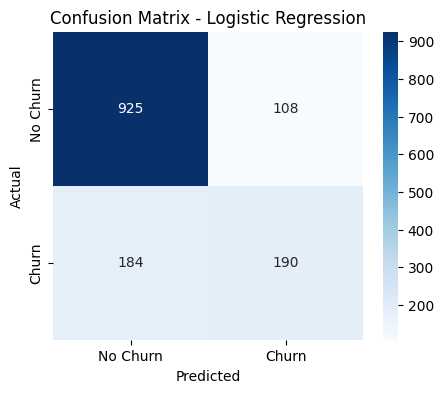

🔹 Random Forest Performance:
Recall (Priority): 0.4706
F1-score (Secondary): 0.5087
Accuracy: 0.7584
Precision: 0.5535

Confusion Matrix:
[[891 142]
 [198 176]]


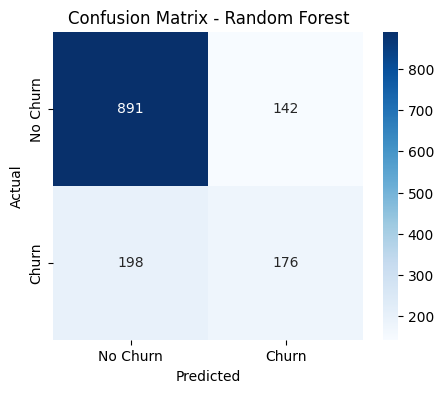

🔹 XGBoost Performance:
Recall (Priority): 0.5134
F1-score (Secondary): 0.5455
Accuracy: 0.7726
Precision: 0.5818

Confusion Matrix:
[[895 138]
 [182 192]]


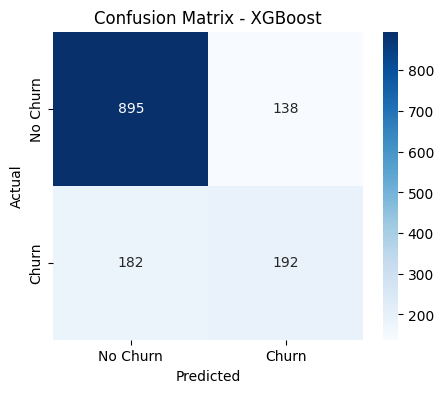

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 551
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
🔹 LightGBM Performance:
Recall (Priority): 0.4893
F1-score (Secondary): 0.5320
Accuracy: 0.7711
Precision: 0.5828

Confusion Matrix:
[[902 131]
 [191 183]]


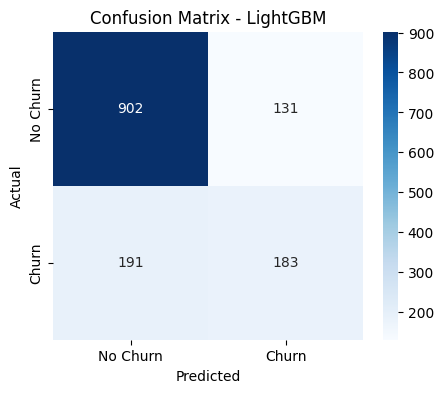

In [161]:
# Initialize Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier()
}

# Store Results
results = {}

# Train & Evaluate Each Model
for name, model in models.items():
    results[name] = evaluate_model_1(model, name)


confusion matrices for different models suggest that XGBoost and LightGBM are performing better in terms of recall,

For telecom churn prediction, the goal is to identify customers likely to leave (Churn = 1) so the company can take proactive measures (e.g., offering discounts, better service, etc.)
- Recall (Sensitivity, True Positive Rate) – Important
    - High recall means catching most actual churners, even if it means predicting a few non-churners incorrectly.
    - Why important?
            A telecom company would rather  side of caution and identify as many churners as possible, even if some non-churners are mistakenly flagged.
            If recall is low, we miss real churners, meaning lost customers and revenue.

- Accuracy
    - Measures overall correctness: (TP + TN) / (n).
    - Problem: In an imbalanced dataset (e.g., 80% non-churn, 20% churn), 
    - a model predicting "No Churn" most of the time can still have high accuracy but perform poorly on actual churn cases.
    - Not the best choice due to potential class imbalance.

    Precision (PPV)
        Precision = TP / (TP + FP)
        High precision means when the model predicts churn, it's usually correct.
        Useful if we want to minimize false alarms, but in churn prediction, missing actual churn cases is worse than a few false positives.

- F1 Score (Balance of Precision & Recall) ⚖
    - F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
    - If precision and recall are both crucial, F1 is a good balanced metric.
    - Best when false positives and false negatives are equally bad, but in telecom, missing churners (false negatives) is usually worse than mistakenly flagging some loyal customers.
    - Useful, but still secondary to recall.

### HyperParameter tuning for XGBoost

In [164]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END alpha=1, colsample_bytree=0.6, lambda=0.01, learning_rate=0.2, max_depth=5, n_estimators=700, subsample=0.8; total time=   0.8s
[CV] END alpha=1, colsample_bytree=0.6, lambda=0.01, learning_rate=0.2, max_depth=5, n_estimators=700, subsample=0.8; total time=   0.8s
[CV] END alpha=1, colsample_bytree=0.6, lambda=0.01, learning_rate=0.2, max_depth=5, n_estimators=700, subsample=0.8; total time=   0.8s
[CV] END alpha=1, colsample_bytree=0.6, lambda=0.01, learning_rate=0.2, max_depth=5, n_estimators=700, subsample=0.8; total time=   0.8s
[CV] END alpha=1, colsample_bytree=0.6, lambda=0.01, learning_rate=0.2, max_depth=5, n_estimators=700, subsample=0.8; total time=   0.8s
[CV] END alpha=0, colsample_bytree=0.8, lambda=0, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=1.0; total time=   1.1s
[CV] END alpha=0, colsample_bytree=0.8, lambda=0, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=1.0; to

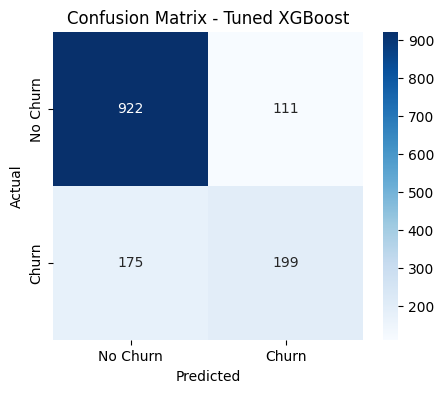

Best Hyperparameters for XGBoost:
{'subsample': 1.0, 'n_estimators': 700, 'max_depth': 3, 'learning_rate': 0.05, 'lambda': 0.1, 'colsample_bytree': 0.6, 'alpha': 0.1}


In [167]:


# Define hyperparameter grid
param_grid_xgb = {
    'n_estimators': [100, 300, 500, 700],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'max_depth': [3, 5, 7, 9],  
    'subsample': [0.6, 0.8, 1.0],  
    'colsample_bytree': [0.6, 0.8, 1.0],  
    'lambda': [0, 0.01, 0.1, 1],  
    'alpha': [0, 0.01, 0.1, 1]
}

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss')

# Randomized Search
random_search_xgb = RandomizedSearchCV(
    xgb_clf, param_distributions=param_grid_xgb, n_iter=20, 
    scoring=['recall', 'f1'], refit='recall',  # Prioritizing recall
    cv=5, verbose=2, n_jobs=1, random_state=42
)

# Fit on training data
random_search_xgb.fit(X_train, y_train)

# Get the best estimator
best_xgb = random_search_xgb.best_estimator_

# Evaluate with best parameters
evaluate_model(best_xgb, "Tuned XGBoost")

# Print best parameters
print("Best Hyperparameters for XGBoost:")
print(random_search_xgb.best_params_)


In [169]:
# Make predictions using the best XGBoost model
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_proba)
}

# Print evaluation metrics
print("\nModel Performance on Test Data:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


Model Performance on Test Data:
Accuracy: 0.7967
Precision: 0.6419
Recall: 0.5321
F1 Score: 0.5819
ROC-AUC: 0.8267


### ROC curve

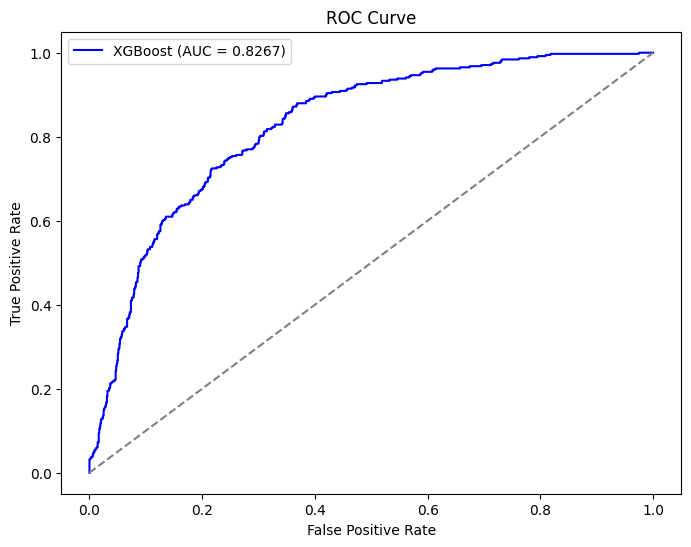

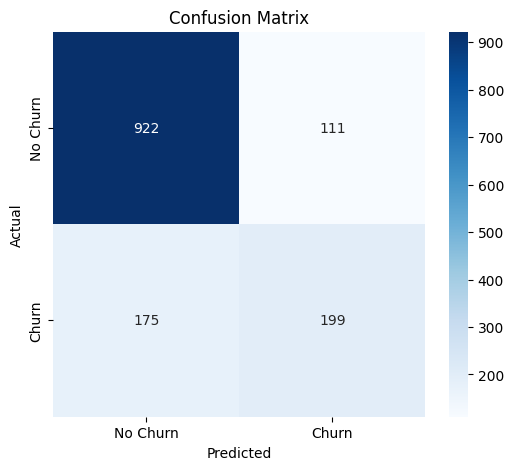

In [170]:

from sklearn.metrics import roc_curve, confusion_matrix

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost (AUC = {metrics["ROC-AUC"]:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


recall is relatively low (53.21%), which means the model is missing a significant portion of actual churn cases. Since churn prediction is often more concerned with recall, we might need to adjust the decision threshold or fine-tune hyperparameters further

In [ ]:
threshold = 0.4  
y_pred_adjusted = (y_proba >= threshold).astype(int)


adjusted_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_adjusted),
    "Precision": precision_score(y_test, y_pred_adjusted),
    "Recall": recall_score(y_test, y_pred_adjusted),
    "F1 Score": f1_score(y_test, y_pred_adjusted),
    "ROC-AUC": roc_auc_score(y_test, y_proba)
}

# Print results
print(f"\nModel Performance with Threshold = {threshold}:")
for metric, value in adjusted_metrics.items():
    print(f"{metric}: {value:.4f}")


Model Performance with Threshold = 0.4:
Accuracy: 0.7740
Precision: 0.5645
Recall: 0.6551
F1 Score: 0.6064
ROC-AUC: 0.8267


In [ ]:



def evaluate_with_threshold(threshold):
    y_pred_adjusted = (y_proba >= threshold).astype(int)

    adjusted_metrics = {
        "Accuracy": accuracy_score(y_test, y_pred_adjusted),
        "Precision": precision_score(y_test, y_pred_adjusted),
        "Recall": recall_score(y_test, y_pred_adjusted),
        "F1 Score": f1_score(y_test, y_pred_adjusted),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }

    print(f"\nModel Performance with Threshold = {threshold}:")
    for metric, value in adjusted_metrics.items():
        print(f"{metric}: {value:.4f}")

    return adjusted_metrics

# Try different thresholds
thresholds = [0.5, 0.4, 0.35, 0.3]
results = {t: evaluate_with_threshold(t) for t in thresholds}



Model Performance with Threshold = 0.5:
Accuracy: 0.7967
Precision: 0.6419
Recall: 0.5321
F1 Score: 0.5819
ROC-AUC: 0.8267

Model Performance with Threshold = 0.4:
Accuracy: 0.7740
Precision: 0.5645
Recall: 0.6551
F1 Score: 0.6064
ROC-AUC: 0.8267

Model Performance with Threshold = 0.35:
Accuracy: 0.7647
Precision: 0.5431
Recall: 0.7246
F1 Score: 0.6208
ROC-AUC: 0.8267

Model Performance with Threshold = 0.3:
Accuracy: 0.7385
Precision: 0.5053
Recall: 0.7647
F1 Score: 0.6085
ROC-AUC: 0.8267


### Best threshold

- tradeoff between Precision & Recall is clear:

    - Threshold = 0.5 → Higher precision (64.19%) but lower recall (53.21%).
    - Threshold = 0.35 → Best balance with recall (72.46%) and F1 score (62.08%).
    - Threshold = 0.3 → Highest recall (76.47%) but lower precision (50.53%).

Goal is to get more churned customers so going witrh 0.35

later for higher precision, keep 0.4 (Lower false positives).

In [ ]:
#  decision threshold
final_threshold = 0.35

# predictions based on the chosen threshold
final_predictions = (y_proba >= final_threshold).astype(int)

# final model performance
final_metrics = {
    "Accuracy": accuracy_score(y_test, final_predictions),
    "Precision": precision_score(y_test, final_predictions),
    "Recall": recall_score(y_test, final_predictions),
    "F1 Score": f1_score(y_test, final_predictions),
    "ROC-AUC": roc_auc_score(y_test, y_proba)
}


print("\n Final Model Performance with Threshold = 0.35:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")


final_results = X_test.copy()
final_results["Actual_Churn"] = y_test
final_results["Predicted_Churn"] = final_predictions
final_results["Churn_Probability"] = y_proba

# Save to CSV
final_results.to_csv("Final_Telco_Churn_Predictions.csv", index=False)
print("\n Final predictions saved to 'Final_Telco_Churn_Predictions.csv'")



📢 Final Model Performance with Threshold = 0.35:
Accuracy: 0.7647
Precision: 0.5431
Recall: 0.7246
F1 Score: 0.6208
ROC-AUC: 0.8267

 Final predictions saved to 'Final_Telco_Churn_Predictions.csv'


In [178]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,StreamingMovies,...,AverageCharges,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bin_12-24,tenure_bin_24-48,tenure_bin_48-60,tenure_bin_60+
0,7590-VHVEG,1,0,1,0,0,0,0,1,0,...,0.149361,0,0,0,1,0,0,0,0,0
1,5575-GNVDE,0,0,0,0,1,0,1,0,0,...,0.388372,0,0,0,0,1,0,1,0,0
2,3668-QPYBK,0,0,0,0,1,0,1,1,0,...,0.374448,0,0,0,0,1,0,0,0,0
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,0.252084,0,0,0,0,0,0,1,0,0
4,9237-HQITU,1,0,0,0,1,0,0,0,0,...,0.576539,1,0,0,1,0,0,0,0,0


In [179]:
churned_customers.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,StreamingMovies,Contract,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bin_12-24,tenure_bin_24-48,tenure_bin_48-60,tenure_bin_60+,CustomerID,Actual_Churn,Predicted_Churn,Churn_Probability
619,1,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,4059-IIEBK,0,1,0.711294
445,1,0,0,0,1,1,0,1,1,0,...,1,0,0,0,1,0,7752-XUSCI,1,1,0.465428
1346,1,0,1,1,1,1,0,0,1,0,...,1,0,1,0,0,0,2845-HSJCY,1,1,0.658721
4283,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,7044-YAACC,0,1,0.698027
6128,1,0,1,0,1,0,0,0,1,0,...,1,0,1,0,0,0,3317-VLGQT,0,1,0.496552


In [181]:
customer_ids = df1["customerID"]
customer_ids_test = customer_ids.loc[X_test.index]
final_results = X_test.copy()
final_results["CustomerID"] = customer_ids_test.values  # Ensure correct mapping
final_results["Actual_Churn"] = y_test
final_results["Predicted_Churn"] = final_predictions
final_results["Churn_Probability"] = y_proba

# Save only customers predicted to churn
churned_customers = final_results[final_results["Predicted_Churn"] == 1]

# Save to CSV
churned_customers.to_csv("Churned_Customers.csv", index=False)
print("\n Churned customers saved to 'Churned_Customers.csv'")





 Churned customers saved to 'Churned_Customers.csv'


In [182]:
churned_customers.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,StreamingMovies,Contract,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bin_12-24,tenure_bin_24-48,tenure_bin_48-60,tenure_bin_60+,CustomerID,Actual_Churn,Predicted_Churn,Churn_Probability
619,1,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,4059-IIEBK,0,1,0.711294
445,1,0,0,0,1,1,0,1,1,0,...,1,0,0,0,1,0,7752-XUSCI,1,1,0.465428
1346,1,0,1,1,1,1,0,0,1,0,...,1,0,1,0,0,0,2845-HSJCY,1,1,0.658721
4283,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,7044-YAACC,0,1,0.698027
6128,1,0,1,0,1,0,0,0,1,0,...,1,0,1,0,0,0,3317-VLGQT,0,1,0.496552


In [183]:
churned_customers.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'AverageCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_bin_12-24', 'tenure_bin_24-48', 'tenure_bin_48-60',
       'tenure_bin_60+', 'CustomerID', 'Actual_Churn', 'Predicted_Churn',
       'Churn_Probability'],
      dtype='object')

In [184]:
churned_customers_final = churned_customers.drop(columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'MonthlyCharges', 'AverageCharges',
    'InternetService_Fiber optic', 'InternetService_No',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
    'tenure_bin_12-24', 'tenure_bin_24-48', 'tenure_bin_48-60',
    'tenure_bin_60+'])

In [185]:
churned_customers_final.to_csv("Churned_customers_final.csv",index=False)